In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1

In [2]:
A = 8
B = 4
C = 4

In [3]:
h = 0.5

In [12]:
def F(x, y):
    return np.sin(np.pi * x * 0.25) * np.sin(np.pi * y * 0.25)

In [5]:
vert_1 = int(C / h - 1.)
vert_2 = int(B / h)
start_1 = 1
start_2 = int(0.5 * (A / h) + 1.)

In [6]:
def b():
    mtx = np.zeros((int((B + C) / h + 1), int(A / h + 1)))
    for i in reversed(range(mtx.shape[0] - 1 - vert_1, mtx.shape[0] - 1)):
        for j in range(start_1, mtx.shape[1] - 1):
            mtx[i][j] = F(i * h, j * h) 

    for i in reversed(range(1, vert_2 + 1)):
        for j in range(start_2, mtx.shape[1] - 1):
            mtx[i][j] = F(i * h, j * h)
    
    return mtx

In [7]:
def A_(P):
    P_ = np.zeros((int((B + C) / h + 1), int(A / h + 1)))
    for i in reversed(range(P.shape[0] - 1 - vert_1, P.shape[0] - 1)):
        for j in range(start_1, P.shape[1] - 1):
            P_[i][j] = (-1) * (h ** (-2)) * (P[i - 1][j] + P[i + 1][j] + P[i][j + 1] + P[i][j - 1] - 4 * P[i][j]) 

    for i in reversed(range(1, vert_2 + 1)):
        for j in range(start_2, P.shape[1] - 1):
            P_[i][j] = (-1) * (h ** (-2)) * (P[i - 1][j] + P[i + 1][j] + P[i][j + 1] + P[i][j - 1] - 4 * P[i][j])
    
    return P_

In [14]:
def CG(eps = 10 ** (-2)):
    T = np.zeros((int((B + C) / h + 1), int(A / h + 1)))
    T_ = np.copy(T)
    r0 = b()
    p = np.copy(r0)
    it = 1
    while True:
        tmp = A_(p)
        alp = np.sum(r0 * r0) / np.sum(tmp * p)
        T = T_ +  alp * p
        r = r0 - alp * tmp
        bett = np.sum(r * r) / np.sum(r0 * r0) 
        p = r + bett * p
        
        if  np.linalg.norm(np.subtract(T, T_), ord = 1) < eps:
            break
        else:
            it += 1
            T_ = np.copy(T)
            r0 = np.copy(r)
    
    print('Количество итераций ', it)
        
    return T

In [15]:
mtx = CG()
print(mtx)

Количество итераций  2
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.20242471e-01 -2.22179115e-01 -2.90291004e-01
  -3.14208718e-01 -2.90291004e-01 -2.22179115e-01 -1.20242471e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.22179115e-01 -4.10533475e-01 -5.36387834e-01
  -5.80582007e-01 -5.36387834e-01 -4.10533475e-01 -2.22179115e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

<AxesSubplot:>

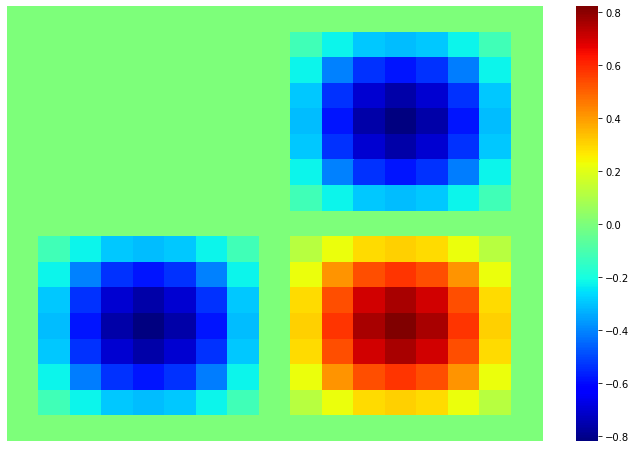

In [16]:
plt.figure(figsize = (12, 8))
sns.heatmap(mtx, cmap = 'jet', xticklabels = False, yticklabels = False)

### 2

In [2]:
A = 2
B = 1
C = 1

In [3]:
h = 0.1

In [4]:
def g(y):
    return np.sin(np.pi * y)

In [5]:
def F(x, y):
    return np.exp(-x) * np.sin(np.pi * y) * (np.pi ** 2 - 1)

In [6]:
vert_1 = int(C / h - 1.)
vert_2 = int(B / h)
start_1 = 1
start_2 = int(0.5 * (A / h) + 1.)

In [7]:
def initial(h = 0.1):
    size_1 = int((B + C) / h + 1)
    size_2 = int(A / h + 1)
    mtx = np.zeros((size_1, size_2))
    for i in reversed(range(int(B / h + 1), size_1 - 1)):
        mtx[i][0] = g(i * h)
    for j in range(1, int((A / 2) / h + 1)):
        mtx[int(B / h)][j] = 0
    for i in reversed(range(1, int(B / h))):
        mtx[i][int((A / 2) / h)] = g(i * h) / np.exp(1)
    for j in range(int((A / 2) / h + 1), size_2 - 1):
        mtx[0][j] = 0
    for i in range(1, size_1 - 1):
        mtx[i][size_2 - 1] = g(i * h) / np.exp(2)
    for j in range(1, size_2 - 1):
        mtx[size_1 -1][j] = 0
    return mtx

In [8]:
def b():
    mtx = np.zeros((int((B + C) / h + 1), int(A / h + 1)))
    for i in reversed(range(mtx.shape[0] - 1 - vert_1, mtx.shape[0] - 1)):
        for j in range(start_1, mtx.shape[1] - 1):
            if j == start_1:
                mtx[i][j] = F(j * h, i * h) + g(i * h) / h ** 2
            elif j == mtx.shape[1] - 2:
                mtx[i][j] = F(j * h, i * h) + np.exp(-2) * g(i * h) / h ** 2
            else:
                mtx[i][j] = F(j * h, i * h)

    for i in reversed(range(1, vert_2 + 1)):
        for j in range(start_2, mtx.shape[1] - 1):
            if j == start_2:
                mtx[i][j] = F(j * h, i * h) + np.exp(-1) * g(i * h) / h ** 2
            elif j == mtx.shape[1] - 2:
                mtx[i][j] = F(j * h, i * h) + np.exp(-2) * g(i * h) / h ** 2
            else:
                mtx[i][j] = F(j * h, i * h)
    
    return mtx

In [8]:
def CG(eps = 10 ** (-2)):
    T = initial()
    T_ = np.copy(T)
    r0 = b()
    p = np.copy(r0)
    print(p.shape)
    it = 1
    while True:
        tmp = A_(p)
        alp = np.sum(r0 * r0) / np.sum(tmp * p)
        T = T_ +  alp * p
        r = r0 - alp * tmp
        bett = np.sum(r * r) / np.sum(r0 * r0) 
        p = r + bett * p
        
        if  np.linalg.norm(np.subtract(T, T_), ord = 1) < eps:
            break
        else:
            it += 1
            T_ = np.copy(T)
            r0 = np.copy(r)
    
    print('Количество итераций ', it)
        
    return T

In [11]:
mtx = CG()
print(mtx)

(21, 21)
Количество итераций  26
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.13680999e-01  1.03039143e-01
   9.33931548e-02  8.45605973e-02  7.66301170e-02  6.94508999e-02
   6.27201572e-02  5.67677963e-02  5.12202592e-02  4.64325462e-02
   4.18209025e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.16234110e-01  1.96035233e-01
   1.77611243e-01  1.60881038e-01  1.45866274e-01  1.31980152e-01
   1.

<AxesSubplot:>

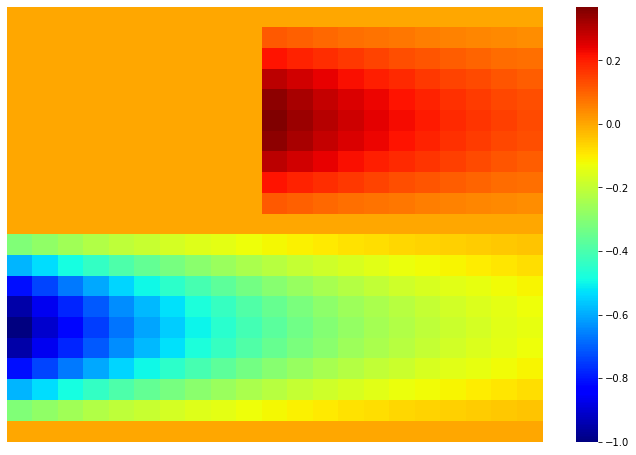

In [12]:
plt.figure(figsize = (12, 8))
sns.heatmap(mtx, cmap = 'jet', xticklabels = False, yticklabels = False)

### 3

In [2]:
Gamma_1 = Gamma_4 = 28
Gamma_2 = Gamma_3 = 70
Gamma_5 = Gamma_6 = 25
A = 150
B = 75
C = 45

In [3]:
h = 1

In [4]:
def initial():
    size_1 = int((B + C) / h + 1)
    size_2 = int(A / h + 1)
    mtx = np.zeros((size_1, size_2))
    mtx[size_1 - 2 : int(B / h) : -1, 0] = Gamma_1
    mtx[int(B / h), : int((A / 2) / h + 1)] = Gamma_2
    mtx[int(B / h - 1) : : -1, int((A / 2) / h)] = Gamma_3
    mtx[0, int((A / 2) / h + 1) : size_2 - 1] = Gamma_4
    mtx[1 : size_1, size_2 - 1] = Gamma_5
    mtx[size_1 - 1, 1 : size_2 - 1] = Gamma_6
    mtx[size_1 - 1, 0] = mtx[0, size_2 - 1] = (Gamma_1 + Gamma_6) / 2
    return mtx

In [5]:
vert_1 = int(C / h - 1.)
vert_2 = int(B / h)
start_1 = 1
start_2 = int(0.5 * (A / h) + 1.)

In [15]:
def b():
    mtx = np.zeros((int((B + C) / h + 1), int(A / h + 1)))
    for i in reversed(range(mtx.shape[0] - 1 - vert_1, mtx.shape[0] - 1)):
        for j in range(start_1, mtx.shape[1] - 1):
            if j == start_1 and i == mtx.shape[0] - 2:
                mtx[i][j] = (Gamma_1 + Gamma_6) / h ** 2
            elif j == start_1 and i == mtx.shape[0] - vert_1 - 1:
                mtx[i][j] = (Gamma_1 + Gamma_2) / h ** 2
            elif j == mtx.shape[1] - 2 and i == mtx.shape[0] - 2:
                mtx[i][j] = (Gamma_6 + Gamma_5) / h ** 2
            elif i == mtx.shape[0] - 2:
                mtx[i][j] = Gamma_6 / h ** 2
            elif i == mtx.shape[0] - vert_1 - 1 and j < start_2:
                mtx[i][j] = Gamma_2 / h ** 2
            elif j == start_1:
                mtx[i][j] = Gamma_1 / h ** 2
            elif j == mtx.shape[1] - 2:
                mtx[i][j] = Gamma_5 / h ** 2
            else:
                mtx[i][j] = 0

    for i in reversed(range(1, vert_2 + 1)):
        for j in range(start_2, mtx.shape[1] - 1):
            if j == start_2 and i == 1:
                mtx[i][j] = (Gamma_3 + Gamma_4) / h ** 2
            elif j == mtx.shape[1] - 2 and i == 1:
                mtx[i][j] = (Gamma_4 + Gamma_5) / h ** 2
            elif i == 1:
                mtx[i][j] = Gamma_4 / h ** 2
            elif j == start_2:
                mtx[i][j] = Gamma_3 / h ** 2
            elif j == mtx.shape[1] - 2:
                mtx[i][j] = Gamma_5 / h ** 2
            else:
                mtx[i][j] = 0
    
    return mtx

In [18]:
mtx = CG(eps = 10 ** (-1))
print(mtx)

(121, 151)
Количество итераций  213
[[ 0.          0.          0.         ... 28.         28.
  26.5       ]
 [ 0.          0.          0.         ... 27.11443217 26.5107655
  25.        ]
 [ 0.          0.          0.         ... 26.54285898 25.92848117
  25.        ]
 ...
 [28.         27.15938708 26.63259763 ... 25.0350255  25.01752399
  25.        ]
 [28.         26.53319894 25.97332629 ... 25.01744437 25.00879335
  25.        ]
 [26.5        25.         25.         ... 25.         25.
  25.        ]]


<AxesSubplot:>

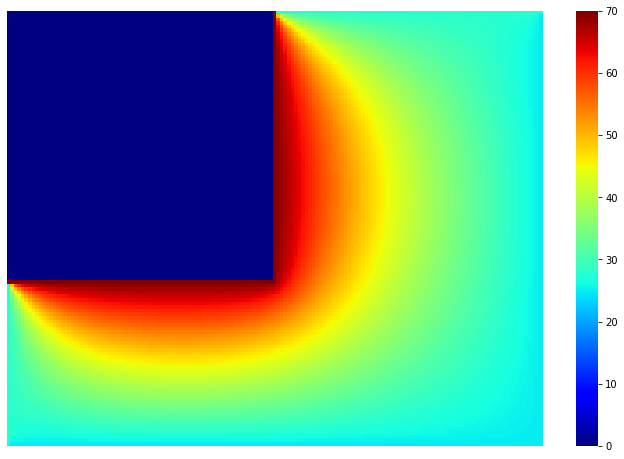

In [19]:
plt.figure(figsize = (12, 8))
sns.heatmap(mtx, cmap = 'jet', xticklabels = False, yticklabels = False)